In [277]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import matplotlib.patches as mpatches

Importing the dataset for 2008 and 2018 into DataFrames named fuel_econ08 and fuel_econ18 respectively

In [278]:
fuel_econ08 = pd.read_csv('all_alpha_08.csv')
fuel_econ18 = pd.read_csv('all_alpha_18.csv')

In [279]:
#check for the shape of datasets
fuel_econ08.shape

(2404, 18)

In [280]:
fuel_econ18.shape

(1611, 18)

* **fuel_econ08** has 2404 records and 18 columns while **fuel_econ18** has 1611 records and 18 columns

##### What columns are in fuel_econ08 and fuel_econ18?

In [281]:
fuel_econ08.columns.to_list()

['Model',
 'Displ',
 'Cyl',
 'Trans',
 'Drive',
 'Fuel',
 'Sales Area',
 'Stnd',
 'Underhood ID',
 'Veh Class',
 'Air Pollution Score',
 'FE Calc Appr',
 'City MPG',
 'Hwy MPG',
 'Cmb MPG',
 'Unadj Cmb MPG',
 'Greenhouse Gas Score',
 'SmartWay']

In [282]:
fuel_econ18.columns.to_list()

['Model',
 'Displ',
 'Cyl',
 'Trans',
 'Drive',
 'Fuel',
 'Cert Region',
 'Stnd',
 'Stnd Description',
 'Underhood ID',
 'Veh Class',
 'Air Pollution Score',
 'City MPG',
 'Hwy MPG',
 'Cmb MPG',
 'Greenhouse Gas Score',
 'SmartWay',
 'Comb CO2']

In [283]:
fuel_econ08.head()

,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Stnd,Underhood ID,Veh Class,Air Pollution Score,FE Calc Appr,City MPG,Hwy MPG,Cmb MPG,Unadj Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT03.7PKR,SUV,7,Drv,15,20,17,22.0527,4,no
1,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,FA,B5,8HNXT03.7PKR,SUV,6,Drv,15,20,17,22.0527,4,no
2,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT02.3DKR,SUV,7,Drv,17,22,19,24.1745,5,no
3,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,FA,B5,8HNXT02.3DKR,SUV,6,Drv,17,22,19,24.1745,5,no
4,ACURA RL,3.5,(6 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXV03.5HKR,midsize car,7,Drv,16,24,19,24.5629,5,no


In [284]:
#check for the Sales Area and the number of tests in each

fuel_econ08['Sales Area'].value_counts()

FA    1157
CA    1084
FC     163
Name: Sales Area, dtype: int64

In [285]:
#check the unique fuel sources

fuel_econ08['Fuel'].unique().tolist()

['Gasoline', 'ethanol/gas', 'ethanol', 'diesel', 'CNG']

In [286]:
fuel_econ08.dtypes

Model                    object
Displ                   float64
Cyl                      object
Trans                    object
Drive                    object
Fuel                     object
Sales Area               object
Stnd                     object
Underhood ID             object
Veh Class                object
Air Pollution Score      object
FE Calc Appr             object
City MPG                 object
Hwy MPG                  object
Cmb MPG                  object
Unadj Cmb MPG           float64
Greenhouse Gas Score     object
SmartWay                 object
dtype: object

In [287]:
fuel_econ18.dtypes

Model                    object
Displ                   float64
Cyl                     float64
Trans                    object
Drive                    object
Fuel                     object
Cert Region              object
Stnd                     object
Stnd Description         object
Underhood ID             object
Veh Class                object
Air Pollution Score       int64
City MPG                 object
Hwy MPG                  object
Cmb MPG                  object
Greenhouse Gas Score      int64
SmartWay                 object
Comb CO2                 object
dtype: object

In [288]:
fuel_econ08.nunique()

Model                   436
Displ                    47
Cyl                       8
Trans                    14
Drive                     2
Fuel                      5
Sales Area                3
Stnd                     12
Underhood ID            343
Veh Class                 9
Air Pollution Score      13
FE Calc Appr              2
City MPG                 39
Hwy MPG                  43
Cmb MPG                  38
Unadj Cmb MPG           721
Greenhouse Gas Score     20
SmartWay                  2
dtype: int64

In [289]:
fuel_econ18.nunique()

Model                   367
Displ                    36
Cyl                       7
Trans                    26
Drive                     2
Fuel                      5
Cert Region               2
Stnd                     19
Stnd Description         19
Underhood ID            230
Veh Class                 9
Air Pollution Score       6
City MPG                 58
Hwy MPG                  62
Cmb MPG                  57
Greenhouse Gas Score     10
SmartWay                  3
Comb CO2                299
dtype: int64

In [290]:
#check how many records have null values across the columns

sum(fuel_econ08.isnull().values.any(axis=1))

199

In [291]:
#check how many records have null values across the columns 2018

sum(fuel_econ18.isnull().values.any(axis=1))

2

In [292]:
#check for duplicated values

fuel_econ08[fuel_econ08.duplicated()]

,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Stnd,Underhood ID,Veh Class,Air Pollution Score,FE Calc Appr,City MPG,Hwy MPG,Cmb MPG,Unadj Cmb MPG,Greenhouse Gas Score,SmartWay
752,DODGE Sprinter 2500,3.5,NaN,NaN,NaN,Gasoline,FA,B8,8MBXT03.5BN8,van,3,NaN,NaN,NaN,NaN,NaN,NaN,no
754,DODGE Sprinter 2500,3.5,NaN,NaN,NaN,Gasoline,CA,B8,8MBXT03.5BN8,van,3,NaN,NaN,NaN,NaN,NaN,NaN,no
769,FORD E150,4.6,NaN,NaN,NaN,Gasoline,FA,B8,8FMXT04.65HA,van,3,NaN,NaN,NaN,NaN,NaN,NaN,no
771,FORD E150,4.6,NaN,NaN,NaN,Gasoline,CA,U2,8FMXT04.65HA,van,3,NaN,NaN,NaN,NaN,NaN,NaN,no
773,FORD E150,5.4,NaN,NaN,NaN,Gasoline,FA,B8,8FMXT05.45H2,van,3,NaN,NaN,NaN,NaN,NaN,NaN,no
775,FORD E150,5.4,NaN,NaN,NaN,Gasoline,CA,U2,8FMXT05.45H2,van,3,NaN,NaN,NaN,NaN,NaN,NaN,no
794,FORD E350,5.4,NaN,NaN,NaN,Gasoline,FA,B8,8FMXT05.45H2,van,3,NaN,NaN,NaN,NaN,NaN,NaN,no
797,FORD E350,5.4,NaN,NaN,NaN,Gasoline,CA,U2,8FMXT05.45H2,van,3,NaN,NaN,NaN,NaN,NaN,NaN,no
800,FORD E350,5.4,NaN,NaN,NaN,Gasoline,FA,HDV,8FMXK05.46R3,van,2,NaN,NaN,NaN,NaN,NaN,NaN,no
958,FREIGHTLINER 2500,3.5,NaN,NaN,NaN,Gasoline,FA,B8,8MBXT03.5BN8,van,3,NaN,NaN,NaN,NaN,NaN,NaN,no


In [293]:
fuel_econ18[fuel_econ18.duplicated()]

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Stnd,Stnd Description,Underhood ID,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay,Comb CO2


In [294]:
#change column names to lowercase and replace spaces with underscore

fuel_econ08.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)

In [295]:
#rename column "sales_area" to "cert_region"

fuel_econ08.rename(columns={'sales_area': 'cert_region'}, inplace=True)

In [296]:
fuel_econ08.head(1)

,model,displ,cyl,trans,drive,fuel,cert_region,stnd,underhood_id,veh_class,air_pollution_score,fe_calc_appr,city_mpg,hwy_mpg,cmb_mpg,unadj_cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT03.7PKR,SUV,7,Drv,15,20,17,22.0527,4,no


In [297]:
print(fuel_econ08.columns)
print(fuel_econ18.columns)

Index(['model', 'displ', 'cyl', 'trans', 'drive', 'fuel', 'cert_region',
       'stnd', 'underhood_id', 'veh_class', 'air_pollution_score',
       'fe_calc_appr', 'city_mpg', 'hwy_mpg', 'cmb_mpg', 'unadj_cmb_mpg',
       'greenhouse_gas_score', 'smartway'],
      dtype='object')
Index(['Model', 'Displ', 'Cyl', 'Trans', 'Drive', 'Fuel', 'Cert Region',
       'Stnd', 'Stnd Description', 'Underhood ID', 'Veh Class',
       'Air Pollution Score', 'City MPG', 'Hwy MPG', 'Cmb MPG',
       'Greenhouse Gas Score', 'SmartWay', 'Comb CO2'],
      dtype='object')


In [298]:
#drop unused columns

fuel_econ08.drop(['stnd', 'underhood_id', 'fe_calc_appr', 'unadj_cmb_mpg'], axis=1, inplace=True)

#confirm changes
fuel_econ08.head(1)

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,15,20,17,4,no


In [299]:
#drop unused columns 2018
fuel_econ18.drop(['Stnd', 'Stnd Description', 'Underhood ID', 'Comb CO2'], axis=1, inplace=True)

#confirm Changes
fuel_econ18.head(1)

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,FA,small SUV,3,20,28,23,5,No


In [300]:
#change column names to lowercase and replace spaces with underscore
fuel_econ18.rename(columns= lambda x: x.strip().lower().replace(" ", "_"), inplace=True)
fuel_econ18.head(1)

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,FA,small SUV,3,20,28,23,5,No


In [301]:
#confirm that columns in both dataframe have identical names
(fuel_econ08.columns == fuel_econ18.columns).all()

True

In [302]:
#make both dataframes only hold records with cert_region with value CA (California)
df_08 = fuel_econ08.query('cert_region == "CA"')
df_18 = fuel_econ18.query('cert_region == "CA"')
print(df_08.head(3))
df_18.head(3)

       model  displ      cyl    trans drive      fuel cert_region  \
0  ACURA MDX    3.7  (6 cyl)  Auto-S5   4WD  Gasoline          CA   
2  ACURA RDX    2.3  (4 cyl)  Auto-S5   4WD  Gasoline          CA   
4   ACURA RL    3.5  (6 cyl)  Auto-S5   4WD  Gasoline          CA   

     veh_class air_pollution_score city_mpg hwy_mpg cmb_mpg  \
0          SUV                   7       15      20      17   
2          SUV                   7       17      22      19   
4  midsize car                   7       16      24      19   

  greenhouse_gas_score smartway  
0                    4       no  
2                    5       no  
4                    5       no  


,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,CA,small SUV,3,20,28,23,5,No
3,ACURA RDX,3.5,6.0,SemiAuto-6,4WD,Gasoline,CA,small SUV,3,19,27,22,4,No
4,ACURA TLX,2.4,4.0,AMS-8,2WD,Gasoline,CA,small car,3,23,33,27,6,No


In [303]:
#confirm df_08 only hold cert_region with value "CA"
df_08['cert_region'].unique()

array(['CA'], dtype=object)

In [304]:
#confirm df_18 only hold cert_region with value "CA"
df_18['cert_region'].unique()

array(['CA'], dtype=object)

since both DataFrames only hold data with cert_region with value "CA", the cert_region column is redundant and should be dropped

In [305]:
df_18.drop(['cert_region'], axis=1, inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18140\1119927902.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_18.drop(['cert_region'], axis=1, inplace=True)


In [306]:
df_08.drop(['cert_region'], axis=1, inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18140\2195486276.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_08.drop(['cert_region'], axis=1, inplace=True)


In [307]:
#check the number of duplicates in both df_08 and df_18
print(df_08.duplicated().sum())
df_18.duplicated().sum()

35


3

In [308]:
#view number of null values in df_08
sum(df_08.isnull().any(axis=0))

7

In [309]:
#view number of null values in df_18
sum(df_18.isnull().any(axis=0))

2

In [310]:
#drop null values in both dataframes
df_08.dropna(axis=0, inplace=True)
df_18.dropna(axis=0, inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18140\3671184123.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_08.dropna(axis=0, inplace=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18140\3671184123.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_18.dropna(axis=0, inplace=True)


In [311]:
#confirm null values no longer in the dataframe
sum(df_18.isnull().any(axis=0))

0

In [312]:
#confirm null values no longer in the dataframe
sum(df_08.isnull().any(axis=0))

0

In [313]:
print(df_08.duplicated().sum())
df_08.drop_duplicates(inplace=True)

23


C:\Users\ASUS\AppData\Local\Temp\ipykernel_18140\2372815740.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_08.drop_duplicates(inplace=True)


In [314]:
#drop duplicates in df_18
df_18.drop_duplicates(inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18140\4197312299.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_18.drop_duplicates(inplace=True)


In [315]:
#confirm duplicates have been dropped
df_18.duplicated().sum()

0

In [316]:
df_08.head(5)

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,SUV,7,15,20,17,4,no
2,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,SUV,7,17,22,19,5,no
4,ACURA RL,3.5,(6 cyl),Auto-S5,4WD,Gasoline,midsize car,7,16,24,19,5,no
6,ACURA TL,3.2,(6 cyl),Auto-S5,2WD,Gasoline,midsize car,7,18,26,21,6,yes
7,ACURA TL,3.5,(6 cyl),Auto-S5,2WD,Gasoline,midsize car,7,17,26,20,6,yes


In [317]:
df_08['cyl'].value_counts()

(6 cyl)     409
(4 cyl)     283
(8 cyl)     199
(5 cyl)      48
(12 cyl)     30
(10 cyl)     14
(2 cyl)       2
(16 cyl)      1
Name: cyl, dtype: int64

In [318]:
df_18['cyl'].value_counts()

4.0     365
6.0     246
8.0     153
3.0      18
12.0      9
5.0       2
16.0      1
Name: cyl, dtype: int64

In [319]:
df_08['cyl'].dtypes

dtype('O')

In [320]:
df_18['cyl'].dtypes

dtype('float64')

In [321]:
#extract the number of cylinders from the cyl column
df_08['cyl'] = df_08['cyl'].str.extract('(\d+)').astype(int)
df_08['cyl'].value_counts()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18140\125269790.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_08['cyl'] = df_08['cyl'].str.extract('(\d+)').astype(int)


6     409
4     283
8     199
5      48
12     30
10     14
2       2
16      1
Name: cyl, dtype: int64

In [322]:
#convert dtype of df_18['cyl] from float to int
df_18['cyl'] = df_18['cyl'].astype(int)
df_18['cyl'].value_counts()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18140\3400980278.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_18['cyl'] = df_18['cyl'].astype(int)


4     365
6     246
8     153
3      18
12      9
5       2
16      1
Name: cyl, dtype: int64

In [323]:
df_08.dtypes

model                    object
displ                   float64
cyl                       int32
trans                    object
drive                    object
fuel                     object
veh_class                object
air_pollution_score      object
city_mpg                 object
hwy_mpg                  object
cmb_mpg                  object
greenhouse_gas_score     object
smartway                 object
dtype: object

In [324]:
#convert datatype of air_pollution_score

df_08[df_08['air_pollution_score'] == '6/4']

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol/gas,small car,6/4,13/18,19/25,15/21,7/6,no


In [325]:
#make separate dataset for the hybrid car models

hb_08 = df_08[df_08['fuel'].str.contains('/')]
hb_18 = df_18[df_18['fuel'].str.contains('/')]

In [326]:
#make two copies of the hybrid dataset

df1 = hb_08.copy()
df2 = hb_08.copy()

In [327]:
#separate rows with double values for hybrid-fuel cars into two rows 

split_columns = ['fuel', 'air_pollution_score', 'city_mpg', 'hwy_mpg', 'cmb_mpg', 'greenhouse_gas_score']

for c in split_columns:
    df1[c] = df1[c].apply(lambda x: x.split("/")[0])
    df2[c] = df2[c].apply(lambda x: x.split("/")[1])

Note that each row holding a record like ("ethanol/gas", "6/4", "19/25") has now been splitted into two separate rows. One holding the first value before the "/" the second holding the other value after the "/"

In [328]:
df1

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol,small car,6,13,19,15,7,no


df1 holds the first record before the (/")

In [329]:
df2

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,gas,small car,4,18,25,21,6,no


df2 holds the second value after the (/)

In [330]:
#join df1 and df2 to form a single dataframe with only 2 rows

new_rows = df1.append(df2)
new_rows

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18140\360741635.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_rows = df1.append(df2)


,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol,small car,6,13,19,15,7,no
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,gas,small car,4,18,25,21,6,no


In [331]:
#find the index for the row holding the original (hybrid) Fuel Sources 2008

hb_08.index

Int64Index([1550], dtype='int64')

In [332]:
#drop the row holding the row containing (/) in the df_08 DataFrame

df_08.drop(hb_08.index, inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18140\954880333.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_08.drop(hb_08.index, inplace=True)


In [333]:
#confirm that the row containing (/) has been dropped successfully

df_08[df_08['fuel'].str.contains('/')]

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway


In [334]:
#append the new rows to the df_08 dataset

df_08.append(new_rows, ignore_index=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18140\98137310.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_08.append(new_rows, ignore_index=True)


,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7,15,20,17,4,no
1,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7,17,22,19,5,no
2,ACURA RL,3.5,6,Auto-S5,4WD,Gasoline,midsize car,7,16,24,19,5,no
3,ACURA TL,3.2,6,Auto-S5,2WD,Gasoline,midsize car,7,18,26,21,6,yes
4,ACURA TL,3.5,6,Auto-S5,2WD,Gasoline,midsize car,7,17,26,20,6,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
982,VOLVO XC 90,3.2,6,Auto-S6,2WD,Gasoline,SUV,7,14,20,16,4,no
983,VOLVO XC 90,3.2,6,Auto-S6,4WD,Gasoline,SUV,7,14,20,16,4,no
984,VOLVO XC 90,4.4,8,Auto-S6,4WD,Gasoline,SUV,7,13,19,15,3,no
985,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol,small car,6,13,19,15,7,no


In [335]:
hb_18

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
108,BMW 330e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,small car,3,28/66,34/78,30/71,10,Yes
160,BMW 530e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,small car,7,27/70,31/75,29/72,10,Elite
162,BMW 530e,2.0,4,SemiAuto-8,4WD,Gasoline/Electricity,small car,7,27/66,31/68,28/67,10,Elite
188,BMW 740e,2.0,4,SemiAuto-8,4WD,Gasoline/Electricity,large car,3,25/62,29/68,27/64,9,Yes
382,CHEVROLET Impala,3.6,6,SemiAuto-6,2WD,Ethanol/Gas,large car,5,14/18,20/28,16/22,4,No
394,CHEVROLET Silverado 15,4.3,6,Auto-6,2WD,Ethanol/Gas,pickup,5,12/18,16/24,14/20,4,No
396,CHEVROLET Silverado 15,4.3,6,Auto-6,4WD,Ethanol/Gas,pickup,5,12/17,15/22,13/19,3,No
398,CHEVROLET Silverado 15,5.3,8,Auto-6,2WD,Ethanol/Gas,pickup,3,12/16,17/23,14/19,3,No
428,CHEVROLET Suburban 1500,5.3,8,Auto-6,2WD,Ethanol/Gas,standard SUV,3,12/16,17/23,14/19,3,No
432,CHEVROLET Suburban 1500,5.3,8,Auto-6,4WD,Ethanol/Gas,standard SUV,3,11/16,15/22,12/18,3,No


Note: hb_18 DataFrame contains records containing (/) i.e hybrid vehicles with two values separated by /
Two copies of df_18 will be made. Each DF will eventually hold each separated values

In [336]:
#make two copies of hb_18
df1 = hb_18.copy()
df2 = hb_18.copy()

In [337]:
df1

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
108,BMW 330e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,small car,3,28/66,34/78,30/71,10,Yes
160,BMW 530e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,small car,7,27/70,31/75,29/72,10,Elite
162,BMW 530e,2.0,4,SemiAuto-8,4WD,Gasoline/Electricity,small car,7,27/66,31/68,28/67,10,Elite
188,BMW 740e,2.0,4,SemiAuto-8,4WD,Gasoline/Electricity,large car,3,25/62,29/68,27/64,9,Yes
382,CHEVROLET Impala,3.6,6,SemiAuto-6,2WD,Ethanol/Gas,large car,5,14/18,20/28,16/22,4,No
394,CHEVROLET Silverado 15,4.3,6,Auto-6,2WD,Ethanol/Gas,pickup,5,12/18,16/24,14/20,4,No
396,CHEVROLET Silverado 15,4.3,6,Auto-6,4WD,Ethanol/Gas,pickup,5,12/17,15/22,13/19,3,No
398,CHEVROLET Silverado 15,5.3,8,Auto-6,2WD,Ethanol/Gas,pickup,3,12/16,17/23,14/19,3,No
428,CHEVROLET Suburban 1500,5.3,8,Auto-6,2WD,Ethanol/Gas,standard SUV,3,12/16,17/23,14/19,3,No
432,CHEVROLET Suburban 1500,5.3,8,Auto-6,4WD,Ethanol/Gas,standard SUV,3,11/16,15/22,12/18,3,No


In [338]:
#split hybrid columns and store each separated values into df1 and df2 respectively

split_columns = ['fuel', 'city_mpg', 'hwy_mpg', 'cmb_mpg']

for c in split_columns:
    df1[c] = df1[c].apply(lambda x: x.split("/")[0])
    df2[c] = df2[c].apply(lambda x: x.split("/")[1])

In [339]:
#DataFrame holding the value before the /
df1

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
108,BMW 330e,2.0,4,SemiAuto-8,2WD,Gasoline,small car,3,28,34,30,10,Yes
160,BMW 530e,2.0,4,SemiAuto-8,2WD,Gasoline,small car,7,27,31,29,10,Elite
162,BMW 530e,2.0,4,SemiAuto-8,4WD,Gasoline,small car,7,27,31,28,10,Elite
188,BMW 740e,2.0,4,SemiAuto-8,4WD,Gasoline,large car,3,25,29,27,9,Yes
382,CHEVROLET Impala,3.6,6,SemiAuto-6,2WD,Ethanol,large car,5,14,20,16,4,No
394,CHEVROLET Silverado 15,4.3,6,Auto-6,2WD,Ethanol,pickup,5,12,16,14,4,No
396,CHEVROLET Silverado 15,4.3,6,Auto-6,4WD,Ethanol,pickup,5,12,15,13,3,No
398,CHEVROLET Silverado 15,5.3,8,Auto-6,2WD,Ethanol,pickup,3,12,17,14,3,No
428,CHEVROLET Suburban 1500,5.3,8,Auto-6,2WD,Ethanol,standard SUV,3,12,17,14,3,No
432,CHEVROLET Suburban 1500,5.3,8,Auto-6,4WD,Ethanol,standard SUV,3,11,15,12,3,No


In [340]:
#DataFrame holding the value after the /
df2

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
108,BMW 330e,2.0,4,SemiAuto-8,2WD,Electricity,small car,3,66,78,71,10,Yes
160,BMW 530e,2.0,4,SemiAuto-8,2WD,Electricity,small car,7,70,75,72,10,Elite
162,BMW 530e,2.0,4,SemiAuto-8,4WD,Electricity,small car,7,66,68,67,10,Elite
188,BMW 740e,2.0,4,SemiAuto-8,4WD,Electricity,large car,3,62,68,64,9,Yes
382,CHEVROLET Impala,3.6,6,SemiAuto-6,2WD,Gas,large car,5,18,28,22,4,No
394,CHEVROLET Silverado 15,4.3,6,Auto-6,2WD,Gas,pickup,5,18,24,20,4,No
396,CHEVROLET Silverado 15,4.3,6,Auto-6,4WD,Gas,pickup,5,17,22,19,3,No
398,CHEVROLET Silverado 15,5.3,8,Auto-6,2WD,Gas,pickup,3,16,23,19,3,No
428,CHEVROLET Suburban 1500,5.3,8,Auto-6,2WD,Gas,standard SUV,3,16,23,19,3,No
432,CHEVROLET Suburban 1500,5.3,8,Auto-6,4WD,Gas,standard SUV,3,16,22,18,3,No


In [341]:
#merge df1 and df2 into a single df to form the new_rows
new_rows = df1.append(df2)
new_rows

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18140\1597888149.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_rows = df1.append(df2)


,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
108,BMW 330e,2.0,4,SemiAuto-8,2WD,Gasoline,small car,3,28,34,30,10,Yes
160,BMW 530e,2.0,4,SemiAuto-8,2WD,Gasoline,small car,7,27,31,29,10,Elite
162,BMW 530e,2.0,4,SemiAuto-8,4WD,Gasoline,small car,7,27,31,28,10,Elite
188,BMW 740e,2.0,4,SemiAuto-8,4WD,Gasoline,large car,3,25,29,27,9,Yes
382,CHEVROLET Impala,3.6,6,SemiAuto-6,2WD,Ethanol,large car,5,14,20,16,4,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,TOYOTA Sequoia FFV,5.7,8,SemiAuto-6,4WD,Gas,standard SUV,5,13,17,14,1,No
1517,TOYOTA Tundra FFV,5.7,8,SemiAuto-6,4WD,Gas,pickup,5,13,17,15,2,No
1577,VOLVO S90,2.0,4,SemiAuto-8,4WD,Electricity,midsize car,7,70,72,71,10,Elite
1601,VOLVO XC 60,2.0,4,SemiAuto-8,4WD,Electricity,small SUV,7,60,58,59,10,Elite


In [342]:
#show the positions of the hybrid records (records containing /)
#in the original df_18 DF

hb_18.index

Int64Index([ 108,  160,  162,  188,  382,  394,  396,  398,  428,  432,  436,
             440,  454,  456,  458,  462,  492,  496,  605,  659,  661,  663,
             697,  701,  709,  715,  892,  896,  933, 1162, 1179, 1192, 1256,
            1507, 1517, 1577, 1601, 1609],
           dtype='int64')

In [343]:
#drop the records
df_18.drop(hb_18.index, inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18140\961873640.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_18.drop(hb_18.index, inplace=True)


In [344]:
#join the new_rows to the df_18 DF
df_18 = df_18.append(new_rows, ignore_index=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18140\48034602.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_18 = df_18.append(new_rows, ignore_index=True)


In [345]:
df_18

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA RDX,3.5,6,SemiAuto-6,2WD,Gasoline,small SUV,3,20,28,23,5,No
1,ACURA RDX,3.5,6,SemiAuto-6,4WD,Gasoline,small SUV,3,19,27,22,4,No
2,ACURA TLX,2.4,4,AMS-8,2WD,Gasoline,small car,3,23,33,27,6,No
3,ACURA TLX,3.5,6,SemiAuto-9,2WD,Gasoline,small car,3,20,32,24,5,No
4,ACURA TLX,3.5,6,SemiAuto-9,4WD,Gasoline,small car,3,21,30,24,5,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
827,TOYOTA Sequoia FFV,5.7,8,SemiAuto-6,4WD,Gas,standard SUV,5,13,17,14,1,No
828,TOYOTA Tundra FFV,5.7,8,SemiAuto-6,4WD,Gas,pickup,5,13,17,15,2,No
829,VOLVO S90,2.0,4,SemiAuto-8,4WD,Electricity,midsize car,7,70,72,71,10,Elite
830,VOLVO XC 60,2.0,4,SemiAuto-8,4WD,Electricity,small SUV,7,60,58,59,10,Elite


In [346]:
df_18.dtypes

model                    object
displ                   float64
cyl                       int32
trans                    object
drive                    object
fuel                     object
veh_class                object
air_pollution_score       int64
city_mpg                 object
hwy_mpg                  object
cmb_mpg                  object
greenhouse_gas_score      int64
smartway                 object
dtype: object

In [347]:
#convert the air_pollution_score in df_08 and df_18 to float datatype
df_18['air_pollution_score'] = df_18['air_pollution_score'].astype(float)
df_08['air_pollution_score'] = df_08['air_pollution_score'].astype(float)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18140\270175654.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_08['air_pollution_score'] = df_08['air_pollution_score'].astype(float)


In [348]:
#convert "city_mpg", "hwy_mpg", and "cmb_mpg" datatypes to float

to_float = ['city_mpg', 'hwy_mpg', 'cmb_mpg']

for c in to_float:
    df_08[c] = df_08[c].astype(float)
    df_18[c] = df_18[c].astype(float)

#convert datatype of "greenhouse_gas_score" to int
df_08['greenhouse_gas_score'] = df_08['greenhouse_gas_score'].astype(int)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18140\1104920946.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_08[c] = df_08[c].astype(float)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18140\1104920946.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_08['greenhouse_gas_score'] = df_08['greenhouse_gas_score'].astype(int)


In [349]:
df_08['greenhouse_gas_score'] = df_08['greenhouse_gas_score'].astype('int64')

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18140\4150241356.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_08['greenhouse_gas_score'] = df_08['greenhouse_gas_score'].astype('int64')


In [350]:
#check consistency of datatypes across df_08 and df_18

df_08.dtypes == df_18.dtypes

model                   True
displ                   True
cyl                     True
trans                   True
drive                   True
fuel                    True
veh_class               True
air_pollution_score     True
city_mpg                True
hwy_mpg                 True
cmb_mpg                 True
greenhouse_gas_score    True
smartway                True
dtype: bool

### Visual Exploration

- explore the distribution of engine cylinders, combined_fuel_economy, and greenhouse_gas_score

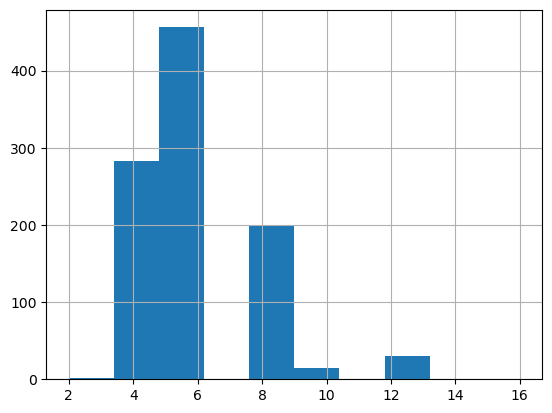

In [351]:
#plot a histogram of number of cylinders

df_08['cyl'].hist();

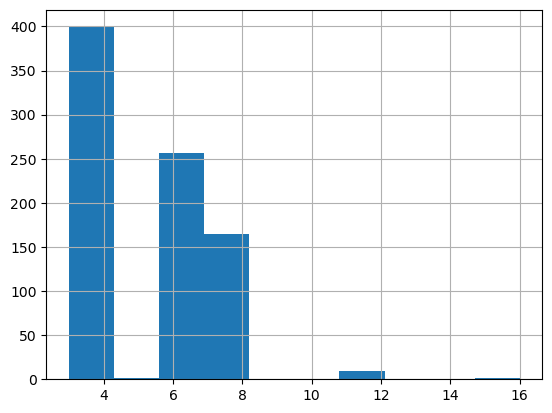

In [352]:
df_18['cyl'].hist();

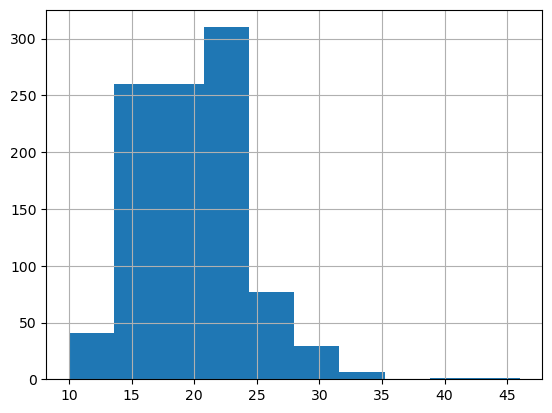

In [353]:
df_08['cmb_mpg'].hist();

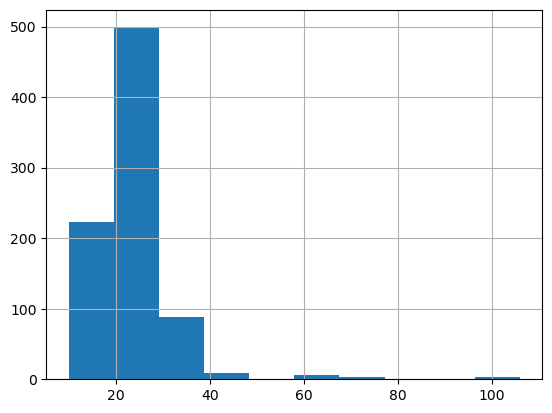

In [354]:
df_18['cmb_mpg'].hist();

What is the correlation between the displacement of vehicle engines anf the combined fuel econonmy in 2008?

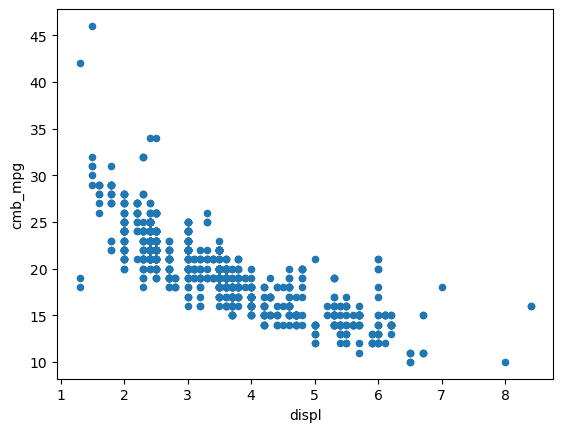

In [355]:
df_08.plot(x='displ', y='cmb_mpg', kind='scatter');

The combined fuel economy decreases and the engine displacement increases

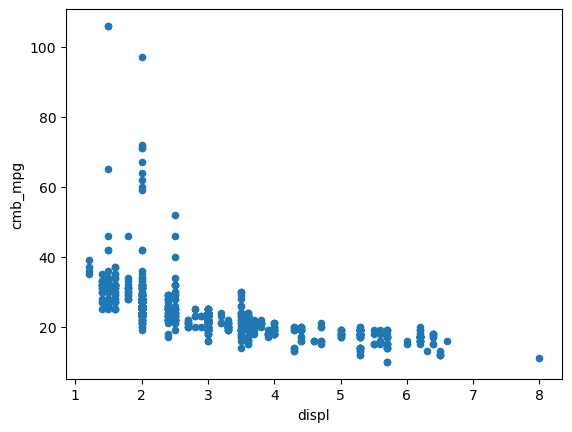

In [356]:
df_18.plot.scatter(x='displ', y='cmb_mpg');

The combined fuel economy slightly decreases as the engine displacement increases

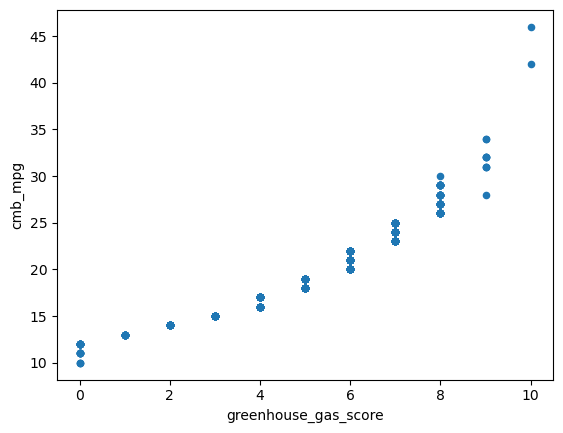

In [357]:
df_08.plot.scatter('greenhouse_gas_score', 'cmb_mpg');

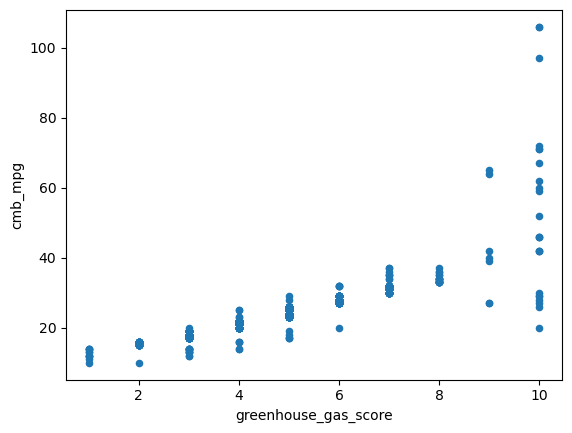

In [358]:
df_18.plot.scatter('greenhouse_gas_score', 'cmb_mpg');

The greenhouse gas score generally increases as the combined fuel economy increases

*Q1: Are more unique models using alternative sources of fuel? By how much?*

In [359]:
df_08['fuel'].value_counts()

Gasoline    984
CNG           1
Name: fuel, dtype: int64

In [360]:
df_18['fuel'].value_counts()

Gasoline       749
Ethanol         26
Gas             26
Diesel          19
Electricity     12
Name: fuel, dtype: int64

In [361]:
#check how many unique models use alternative fuels in 2008
alt_08 = df_08.query('fuel in ["CNG", "ethanol"]').model.nunique()

In [362]:
#check how many unique models use alternative fuels in 2008
alt_18 = df_18.query('fuel in ["Ethanol", "Electricity"]').model.nunique()

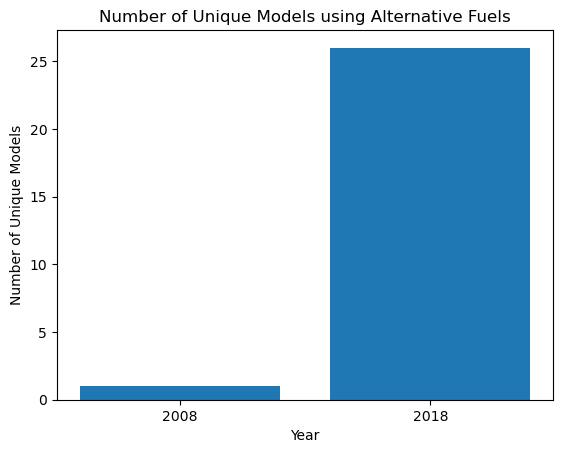

In [363]:
plt.bar(['2008', '2018'], [alt_08, alt_18])
plt.title('Number of Unique Models using Alternative Fuels')
plt.xlabel('Year')
plt.ylabel('Number of Unique Models');

In [364]:
alt_18

26

The number of unique models using alternative fuel sources are more in 2018 than in 2008. Only 1 model uses alternative fuel sources while 26 unique model used alternative fuel sources in 2018

In [365]:
#check for the total number of unique models
total_08 = df_08.model.nunique()
total_18 = df_18.model.nunique()

In [366]:
total_08

376

In [367]:
total_18

357

In [368]:
#compute the proportion of models using Alternative Fuels to Total Unique Models

prop_08 = alt_08/total_08
prop_08

0.0026595744680851063

In [369]:
prop_18 = alt_18/total_18
prop_18

0.07282913165266107

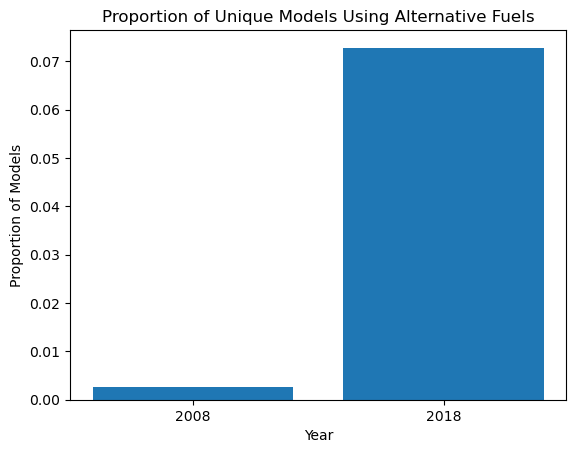

In [370]:
plt.bar(['2008', '2018'], [prop_08, prop_18])
plt.title('Proportion of Unique Models Using Alternative Fuels')
plt.xlabel('Year')
plt.ylabel('Proportion of Models');

In 2008, approximately 0.3% of models used alternative fuel sources while about 7% of models used alternative fuel sources

In [371]:
#what is the mean combined fuel economy per vehicle class category in 2008

df_08['veh_class'].value_counts()
veh_08 = df_08.groupby('veh_class').cmb_mpg.mean()
veh_08

veh_class
SUV              18.471429
large car        18.509091
midsize car      21.601449
minivan          19.117647
pickup           16.277108
small car        21.123867
station wagon    22.366667
van              14.952381
Name: cmb_mpg, dtype: float64

In [372]:
#what is the mean combined fuel economy per vehicle class category in 2018

df_18['veh_class'].value_counts()
veh_18 = df_18.groupby('veh_class').cmb_mpg.mean()
veh_18

veh_class
large car          23.409091
midsize car        27.884058
minivan            20.800000
pickup             18.589744
small SUV          24.074074
small car          25.421053
special purpose    18.500000
standard SUV       18.197674
station wagon      27.529412
Name: cmb_mpg, dtype: float64

In [373]:
#compute the increase in mean combined fuel economy per vehicle class category between 2008 and 2018

veh_increase = veh_18 - veh_08
veh_increase

veh_class
SUV                     NaN
large car          4.900000
midsize car        6.282609
minivan            1.682353
pickup             2.312635
small SUV               NaN
small car          4.297186
special purpose         NaN
standard SUV            NaN
station wagon      5.162745
van                     NaN
Name: cmb_mpg, dtype: float64

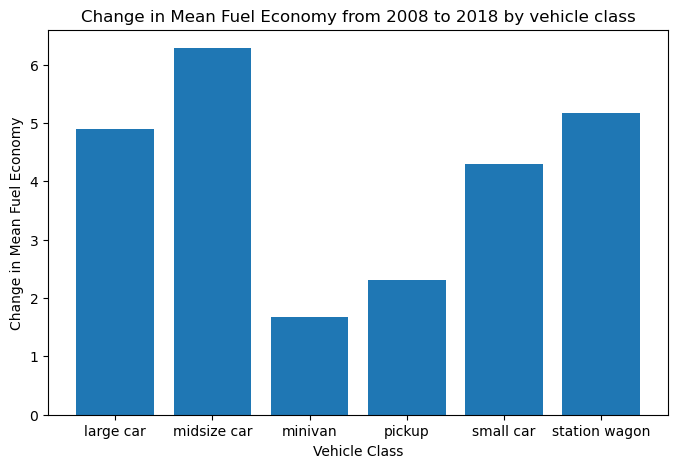

In [374]:
veh_increase.dropna(inplace=True)
plt.subplots(figsize=(8, 5))
plt.bar(veh_increase.index, veh_increase)
plt.title('Change in Mean Fuel Economy from 2008 to 2018 by vehicle class')
plt.xlabel('Vehicle Class')
plt.ylabel('Change in Mean Fuel Economy');

The minivan and pickup trucks have the least improvement in combined fuel economy between 2008 and 2018 while the midsize cars, station wagon, and large car have the most improved combined fuel economy.

___

What features are common to vehicles with "Smartway" in 2008?

In [375]:
df_08[df_08['smartway'] == 'yes'].describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,2.602895,4.826316,7.365789,20.984211,28.413158,23.736842,6.868421
std,0.623436,1.002025,1.148195,3.442672,3.075194,3.060379,0.827338
min,1.300000,4.000000,6.000000,17.000000,22.000000,20.000000,6.000000
25%,2.275000,4.000000,7.000000,19.000000,26.000000,22.000000,6.000000
50%,2.400000,4.000000,7.000000,20.000000,28.000000,23.000000,7.000000
75%,3.000000,6.000000,7.000000,22.000000,30.000000,25.000000,7.000000
max,5.000000,8.000000,9.500000,48.000000,45.000000,46.000000,10.000000


In 2008, Smartway Vehicles have an average air pollution score of 7.4, average 20.9 city fuel economy, average 28.4 highway fuel economy, and an average 6.9 greenhouse gas score

In [376]:
df_18['smartway'].value_counts()

No       724
Yes       91
Elite     17
Name: smartway, dtype: int64

In [377]:
df_18.query('smartway in ["Yes", "Elite"]').describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000
mean,1.787963,3.935185,5.212963,34.907407,41.472222,37.361111,7.925926
std,0.408031,0.416329,1.798498,16.431982,13.095236,14.848429,1.197378
min,1.200000,3.000000,3.000000,25.000000,27.000000,26.000000,7.000000
25%,1.500000,4.000000,3.000000,28.000000,36.000000,31.000000,7.000000
50%,1.700000,4.000000,5.500000,28.500000,37.000000,32.000000,7.000000
75%,2.000000,4.000000,7.000000,31.250000,40.250000,35.000000,9.000000
max,3.500000,6.000000,7.000000,113.000000,99.000000,106.000000,10.000000


In [378]:
#describe the records with cmb_mpg greater than the mean cmb_mpg

top_08 = df_08.query('cmb_mpg > cmb_mpg.mean()')
top_08.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000
mean,2.667181,4.888031,7.003861,20.322394,27.608108,22.996139,6.640927
std,0.666034,1.034703,1.153158,3.199722,3.051919,2.927886,0.805220
min,1.300000,4.000000,6.000000,17.000000,20.000000,20.000000,6.000000
25%,2.300000,4.000000,6.000000,18.000000,25.000000,21.000000,6.000000
50%,2.500000,4.000000,7.000000,20.000000,27.000000,22.000000,6.000000
75%,3.000000,6.000000,7.000000,21.000000,29.000000,24.000000,7.000000
max,6.000000,8.000000,9.500000,48.000000,45.000000,46.000000,10.000000


Top vehicles (vehicles with combined fuel economy greater than the average) in 2008 have average air pollution score of 7, average 20.3 fuel economy, 27.6 highway fuel economy, 22.9 combined fuel economy and 6.6 greenhouse gas score

In [379]:
#what is the top 10 mean combined fuel economy per model among the 2008 top vehicles
mdl_cmb_mpg = top_08.groupby(['model']).cmb_mpg.mean()
mdl_cmb_mpg.head(10)

model
ACURA TL             20.666667
ACURA TSX            22.500000
AUDI A3              23.333333
AUDI A4              21.666667
AUDI A4 Avant        20.000000
AUDI A4 Cabriolet    20.000000
AUDI A6              20.500000
AUDI A6 Avant        20.000000
AUDI TT Coupe        23.000000
AUDI TT Roadster     22.500000
Name: cmb_mpg, dtype: float64

In [380]:
#describe the records with cmb_mpg greater than the mean cmb_mpg

top_18 = df_18.query('cmb_mpg > cmb_mpg.mean()')
top_18.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000
mean,1.964329,4.021341,4.856707,27.472561,35.304878,30.411585,6.329268
std,0.398593,0.465477,1.860802,11.033692,9.024857,10.081539,1.410358
min,1.200000,3.000000,1.000000,21.000000,27.000000,25.000000,4.000000
25%,1.600000,4.000000,3.000000,23.000000,31.000000,26.000000,5.000000
50%,2.000000,4.000000,5.000000,25.000000,33.000000,28.000000,6.000000
75%,2.000000,4.000000,7.000000,28.000000,36.000000,31.000000,7.000000
max,3.500000,6.000000,7.000000,113.000000,99.000000,106.000000,10.000000


In [381]:
#what is the top 10mean combined fuel economy per model among the 2018 top vehicles

mdl_cmb_mpg_18 = top_18.groupby(['model'])['cmb_mpg'].mean()
mdl_cmb_mpg_18.head(10)

model
ACURA TLX                    27.0
ALFA ROMEO 4C                28.0
AUDI A3                      28.0
AUDI A3 Cabriolet            26.5
AUDI A4                      27.0
AUDI A4 Ultra                31.0
AUDI A5                      27.0
AUDI A5 Cabriolet            27.0
AUDI A5 Sportback quattro    27.0
AUDI A6                      27.0
Name: cmb_mpg, dtype: float64

In [382]:
#rename the columns of df_08
df_08 = df_08.rename(columns= lambda x: x[:10] + "_2008")

In [383]:
#merge df_08 and df_18 along the column axis
df_combined = pd.concat([df_08, df_18], axis=1)

In [384]:
df_combined

,model_2008,displ_2008,cyl_2008,trans_2008,drive_2008,fuel_2008,veh_class_2008,air_pollut_2008,city_mpg_2008,hwy_mpg_2008,...,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,6.0,Auto-S5,4WD,Gasoline,SUV,7.0,15.0,20.0,...,SemiAuto-6,2WD,Gasoline,small SUV,3.0,20.0,28.0,23.0,5.0,No
2,ACURA RDX,2.3,4.0,Auto-S5,4WD,Gasoline,SUV,7.0,17.0,22.0,...,AMS-8,2WD,Gasoline,small car,3.0,23.0,33.0,27.0,6.0,No
4,ACURA RL,3.5,6.0,Auto-S5,4WD,Gasoline,midsize car,7.0,16.0,24.0,...,SemiAuto-9,4WD,Gasoline,small car,3.0,21.0,30.0,24.0,5.0,No
6,ACURA TL,3.2,6.0,Auto-S5,2WD,Gasoline,midsize car,7.0,18.0,26.0,...,SemiAuto-9,2WD,Gasoline,small car,3.0,20.0,30.0,23.0,5.0,No
7,ACURA TL,3.5,6.0,Auto-S5,2WD,Gasoline,midsize car,7.0,17.0,26.0,...,AutoMan-6,2WD,Gasoline,small car,1.0,24.0,34.0,28.0,6.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
823,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,AutoMan-7,4WD,Gas,small car,5.0,24.0,32.0,27.0,6.0,No
824,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,AutoMan-7,4WD,Gas,small SUV,5.0,23.0,31.0,26.0,5.0,No
828,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,SemiAuto-6,4WD,Gas,pickup,5.0,13.0,17.0,15.0,2.0,No
830,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,SemiAuto-8,4WD,Electricity,small SUV,7.0,60.0,58.0,59.0,10.0,Elite


#### Which Vehicles improved the most between 2008 and 2018

In [385]:
model_mpg = df_combined.groupby(['model'])['cmb_mpg_2008', 'cmb_mpg'].mean()
model_mpg

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18140\835431547.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  model_mpg = df_combined.groupby(['model'])['cmb_mpg_2008', 'cmb_mpg'].mean()


,cmb_mpg_2008,cmb_mpg
model,,
ACURA RDX,17.0,22.5
ACURA TLX,19.0,25.0
ACURA TLX AWD A-SPEC,NaN,23.0
ACURA TLX FWD A-SPEC,21.0,23.0
ALFA ROMEO 4C,20.0,28.0
...,...,...
VOLVO V60 Polestar,NaN,22.0
VOLVO V90,NaN,26.0
VOLVO V90 CC,NaN,25.5


Compute the change in Combined Fuel Economy in miles per gallon

In [386]:
model_mpg['mpg_change'] = model_mpg['cmb_mpg'] - model_mpg['cmb_mpg_2008']
model_mpg.head()

,cmb_mpg_2008,cmb_mpg,mpg_change
model,,,
ACURA RDX,17.0,22.5,5.5
ACURA TLX,19.0,25.0,6.0
ACURA TLX AWD A-SPEC,NaN,23.0,NaN
ACURA TLX FWD A-SPEC,21.0,23.0,2.0
ALFA ROMEO 4C,20.0,28.0,8.0


In [387]:
# find the value of the highest change in cmb_mpg

model_mpg['mpg_change'].max()

34.5

The highest value of cmb_mpg change is 34.5

In [388]:
#use value of 34.5 to extract the vehicle that is most improved

model_mpg.query('mpg_change == 34.5')

,cmb_mpg_2008,cmb_mpg,mpg_change
model,,,
BMW 330e,16.0,50.5,34.5


The BMW 330e is the most improved model with a 34.5 increase in combined fuel economy between 2008 and 2018

In [389]:
df_combined.columns.to_list()

['model_2008',
 'displ_2008',
 'cyl_2008',
 'trans_2008',
 'drive_2008',
 'fuel_2008',
 'veh_class_2008',
 'air_pollut_2008',
 'city_mpg_2008',
 'hwy_mpg_2008',
 'cmb_mpg_2008',
 'greenhouse_2008',
 'smartway_2008',
 'model',
 'displ',
 'cyl',
 'trans',
 'drive',
 'fuel',
 'veh_class',
 'air_pollution_score',
 'city_mpg',
 'hwy_mpg',
 'cmb_mpg',
 'greenhouse_gas_score',
 'smartway']

In [390]:
df_combined['veh_class'].unique().tolist()

['small SUV',
 'small car',
 'midsize car',
 'standard SUV',
 'station wagon',
 'large car',
 'pickup',
 'special purpose',
 'minivan',
 nan]

In [391]:
df_combined['veh_class_2008'].unique().tolist()

['SUV',
 'midsize car',
 'small car',
 'station wagon',
 'large car',
 'minivan',
 'van',
 'pickup',
 nan]

In [392]:
aps_08 = df_08.groupby('fuel_2008')['air_pollut_2008'].mean()
aps_08

fuel_2008
CNG         9.500000
Gasoline    6.706809
Name: air_pollut_2008, dtype: float64

In [393]:
aps_18 = df_18.groupby('fuel')['air_pollution_score'].mean()
aps_18

fuel
Diesel         2.368421
Electricity    5.166667
Ethanol        3.692308
Gas            3.692308
Gasoline       4.024032
Name: air_pollution_score, dtype: float64

In [394]:
aps_08 = pd.DataFrame(aps_08)
aps_18 = pd.DataFrame(aps_18)

In [395]:
aps = pd.concat([aps_08, aps_18], axis=1).rename_axis('fuel').reset_index().fillna(value=0)
aps

,fuel,air_pollut_2008,air_pollution_score
0,CNG,9.500000,0.000000
1,Gasoline,6.706809,4.024032
2,Diesel,0.000000,2.368421
3,Electricity,0.000000,5.166667
4,Ethanol,0.000000,3.692308
5,Gas,0.000000,3.692308


#### Which Car Models have the highest average Air Pollution Score in 2008 and 2018

In [396]:
aps_model = df_combined.groupby('model')[['air_pollut_2008', 'air_pollution_score']].mean().fillna(value=0).head()
aps_model = aps_model.rename_axis('model').reset_index()

In [397]:
aps_model

,model,air_pollut_2008,air_pollution_score
0,ACURA RDX,7.0,3.0
1,ACURA TLX,7.0,3.0
2,ACURA TLX AWD A-SPEC,0.0,3.0
3,ACURA TLX FWD A-SPEC,7.0,3.0
4,ALFA ROMEO 4C,7.0,1.0


<Figure size 800x500 with 0 Axes>

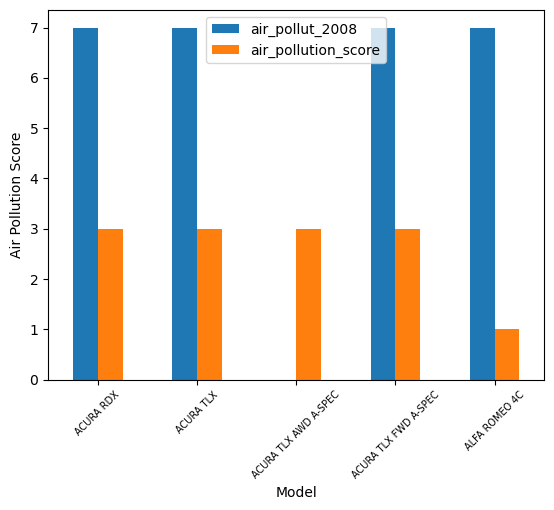

In [398]:
plt.figure(figsize=[8,5])
aps_model.plot(x='model', kind='bar')
plt.ylabel('Air Pollution Score')
plt.xlabel('Model')
plt.xticks(rotation=45, fontsize=7);

The air pollution scores of Acura RDX, TLX, TLX FWD A-SPEC have air pollution scores from 7 to 3 while the APS for Alfa Romeo 4C decreased from 7 to 1.

<AxesSubplot: xlabel='fuel'>

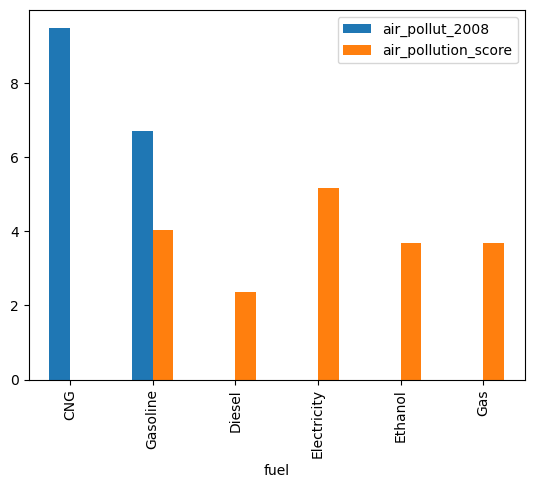

In [399]:
aps.plot(x='fuel', kind='bar', stacked=False)

In [400]:
df_combined.head(0)

,model_2008,displ_2008,cyl_2008,trans_2008,drive_2008,fuel_2008,veh_class_2008,air_pollut_2008,city_mpg_2008,hwy_mpg_2008,...,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway


#### Which fuel sources gave the best Greenhouse Gas Scores?

In [401]:
ghs_08 = df_combined.groupby('fuel_2008')['greenhouse_2008'].mean()
ghs_08 = pd.DataFrame(ghs_08)
ghs_08.reset_index()

,fuel_2008,greenhouse_2008
0,CNG,9.000000
1,Gasoline,5.190041


In [402]:
#labels = ['Gasoline', 'CNG']
#fig, ax = plt.subplots()
#ax.pie(ghs_08['greenhouse_2008'], startangle=90, counterclock=False, labels=labels, radius=0.9)
#plt.title('Greehouse_gas_sc');

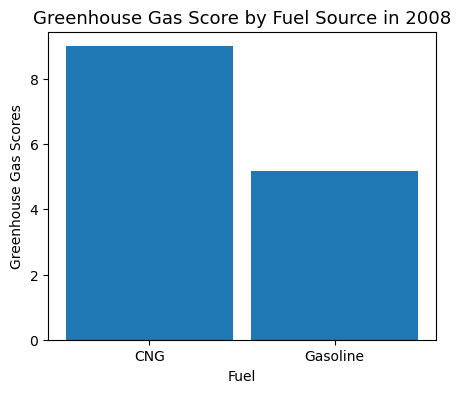

In [403]:
plt.figure(figsize=(5,4))
plt.bar(['CNG', 'Gasoline'], ghs_08['greenhouse_2008'], width=0.9)
plt.title('Greenhouse Gas Score by Fuel Source in 2008', y= 1, fontsize=13)
plt.xlabel('Fuel', fontsize=10)
plt.ylabel('Greenhouse Gas Scores', fontsize=10);

The CNG fuel source has Greenhouse gas score better than when Gasoline is used as a fuel source

**NB:** Only 1 record of vehicle using the CNG source is available in the dataset. The average greenhouse gas score might be lower if more records with CNG as fuel source were collected in 2008.

In [404]:
ghs_18 = df_combined.groupby('fuel')['greenhouse_gas_score'].mean()
ghs_18 = pd.DataFrame(ghs_18).reset_index()

In [405]:
ghs_18

,fuel,greenhouse_gas_score
0,Diesel,5.736842
1,Electricity,9.833333
2,Ethanol,3.576923
3,Gas,3.576923
4,Gasoline,4.724967


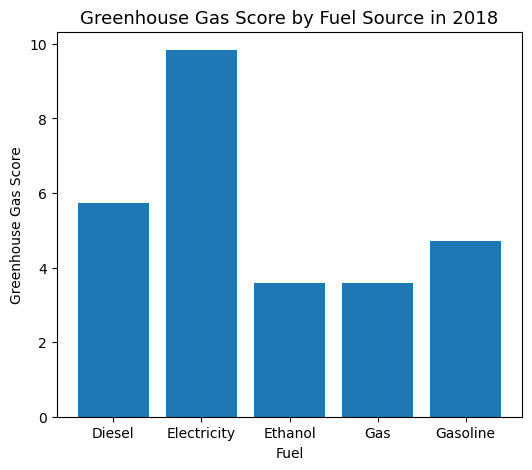

In [406]:
x = ghs_18.fuel.tolist()
heights = ghs_18.greenhouse_gas_score.tolist()

plt.figure(figsize=(6,5))
plt.bar(x, heights, width= 0.8)
plt.title('Greenhouse Gas Score by Fuel Source in 2018', y=1, fontsize=13)
plt.xlabel('Fuel', fontsize=10)
plt.ylabel('Greenhouse Gas Score', fontsize=10);

Electricity as a fuel source has the best Greenhouse Gas Score in 2018,having the score of 9.8. Followed by Diesel and Gasoline with 5.7 and 4.7 respectively.

Ethanol and Gas has the least Greenhouse gas scores with 3.6 each.

In [407]:
ghs = pd.concat([ghs_08, ghs_18], keys=['2008', '2018'], names=['Year', 'Fuel']).fillna(value=0)
ghs = ghs.rename_axis(['year', 'fuels']).reset_index()
ghs

,year,fuels,greenhouse_2008,fuel,greenhouse_gas_score
0,2008,CNG,9.000000,0,0.000000
1,2008,Gasoline,5.190041,0,0.000000
2,2018,0,0.000000,Diesel,5.736842
3,2018,1,0.000000,Electricity,9.833333
4,2018,2,0.000000,Ethanol,3.576923
5,2018,3,0.000000,Gas,3.576923
6,2018,4,0.000000,Gasoline,4.724967


In [408]:
#what is the greenhouse gas score 

#fuel_ghs = pd.concat([ghs_08, ghs_18], axis=1).rename_axis('fuel').reset_index().fillna(value='0')
#fuel_ghs[['greenhouse_2008', 'greenhouse_gas_score']] = fuel_ghs[['greenhouse_2008', 'greenhouse_gas_score']].astype(int)
#fuel_ghs['total_ghs'] = fuel_ghs['greenhouse_2008'] + fuel_ghs['greenhouse_gas_score']
#fuel_ghs

In [409]:
#x = np.arange(5)
#y1 = [34, 66, 12, 89, 67]
#y2 = [12, 56, 78, 45, 90]
#y3 = [14, 23, 45, 25, 89]
#width = 0.2

#plt.bar(x-0.2, y1, width, color='cyan')
#plt.bar(x-0.15, y2, width-0.1, color='orange')
#plt.show();